In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import os

In [2]:
def load_calibration_images(folder_path):
    calibration_images = []

    # List all files in the folder
    file_list = os.listdir(folder_path)

    for file_name in file_list:
        if file_name.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, file_name)
            print(image_path)
            calibration_images.append(image_path)

    return calibration_images

In [3]:
calibration_folder_path = './CalibrationImages'
calibration_images = load_calibration_images(calibration_folder_path)

./CalibrationImages/img8.png
./CalibrationImages/img5.png
./CalibrationImages/img4.png
./CalibrationImages/img6.png
./CalibrationImages/img7.png
./CalibrationImages/img3.png
./CalibrationImages/img2.png
./CalibrationImages/img1.png


Images in the directory:  ['inputImg2.jpeg', 'inputImg3.png', 'inputImg1.png']


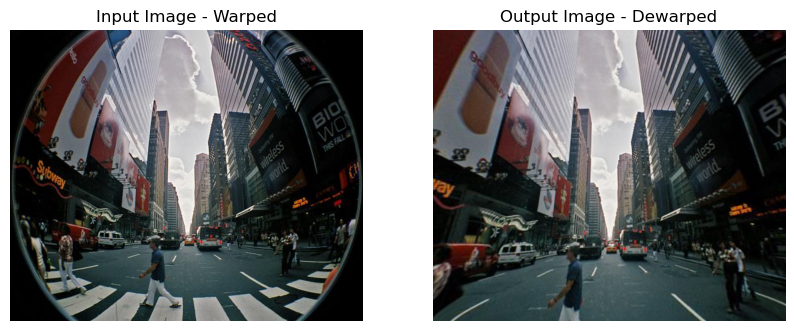

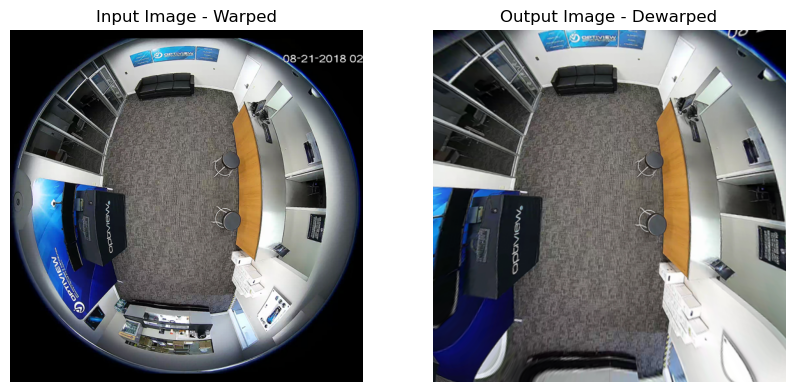

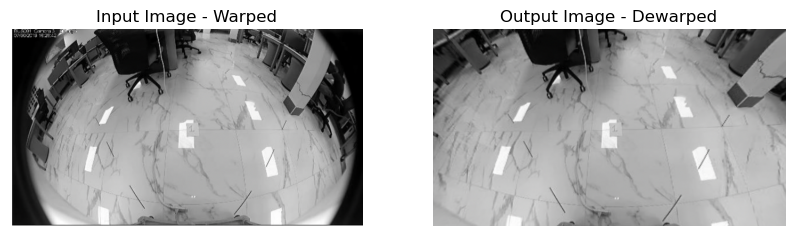

In [12]:
def dewarp_foo(lengthOfArray, input_image_path, calibration_images):
    
    figOut, axsOut = plt.subplots(1, 2, figsize=(10, 5))
    
    # Load the input image from the directory and display it
    input_image = Image.open("./InputImages/"+input_image_path)
    input_image = input_image.convert('RGB')
    axsOut[0].imshow(input_image)
    axsOut[0].set_title("Input Image - Warped")
    axsOut[0].axis('off')

    # Converting the image loaded into array using numpy
    input_image = np.array(input_image)

    # Getting the height and width of the image using shape
    height, width, _ = input_image.shape

    # Define the number of inner corners in the calibration image (chessboard) used in (row, col) pattern
    adjustment_param = (9, 6)

    # EPS - Epsilon criterion - Means the algorithm should stop if the specified accuracy is reached
    # MAX_ITER - Means the algorithm should stop if the specified iteration limit is reached
    # 30 - max number of iterations allowed
    # 0.001 - Desired accuracy for epsilon criterion, algorithm should stop if the change between consecutive
    # iterations is smaller than 0.001.
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # Arrays to store object points and image points
    obj_points = [] 
    img_points = []

    # Create object points for the calibration pattern
    # objp will contain a set of 3D points in a format where each point is represented by 
    # three values (X, Y, and Z coordinates)
    # objp[:, :2] is used to fill the first two columns of the objp 
    # np.mgrid[] generates grid of points, Grid is transposed(.T) to make it easier to reshape into a 2D array
    objp = np.zeros((adjustment_param[0] * adjustment_param[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:adjustment_param[0], 0:adjustment_param[1]].T.reshape(-1, 2)

    for calibration_image_path in calibration_images:
        calibration_image = cv2.imread(calibration_image_path)
        gray = cv2.cvtColor(calibration_image, cv2.COLOR_BGR2GRAY)

        # Find the calibration image corners
        ret, corners = cv2.findChessboardCorners(gray, adjustment_param, None)

        if ret:
            obj_points.append(objp)
            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            img_points.append(corners2)

    # obj_points -> List of 3D object points. Corresponds to corner of calibration pattern in 3D space
    # img_points -> List of 2D image points. Represent the coordinates of the features in the calibration images.
    # (width, height) -> Represents the w and h of input image
    # ret - Bool which says if the calibration is successfull or not.
    # mtx - 3x3 matrix for transforming 3D world points into 2D image points.
    # dist - The distortion coefficients that describe the radial and tangential lens distortions.
    # rvecs - Vectors that represent the rotation of the camera with respect to each calibration image.
    # tvecs - Vectors that represent the translation of the camera with respect to each calibration image. 
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (width, height), None, None)
    
    if ret:
        # Perform dewarping using the calibration
        output_image = cv2.undistort(input_image, mtx, dist, None, mtx)

    # Display the dewarped image using Matplotlib
    axsOut[1].imshow(output_image)
    axsOut[1].set_title("Output Image - Dewarped")
    axsOut[1].axis('off')
    
    plt.show()


# Input images are stored in the image_Array variable
image_Array = []
input_Folder = 'InputImages' # input directory path
images_In_Folder = images_In_Folder = [f for f in os.listdir(input_Folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Iterate the images, display and store it in the array
for image_file in images_In_Folder:
    image_Array.append(image_file)

print("Images in the directory: ",image_Array)
lengthOfArray = len(image_Array) #getting the number of images read from the input directory

# Calling the dewarp function on each image in the image_Array
for input_image_path in image_Array:
    dewarp_foo(lengthOfArray, input_image_path, calibration_images)